In [Positive knots, closed braids, and the Jones polynomial: http://stoimenov.net/stoimeno/homepage/papers/pos.pdf] Corollaries 4.3 and 4.4 it is shown that for a positive fibered knot u(K) ≥ g(K) with equality for braid positive knots. (Here u stands for the unknotting number and g for the Seifert genus.) 

He also shows that equality holds for braid positive knots and conjectures that equality holds more general for fibered positive knots.

Here we present an infinite family of potential counterexample to this conjecture.

For that we describe for any n a positive diagram D_n of a fibered knot K of genus 5n+2. Such that the unknotting number in the diagram D seems larger than 5n+2.

We also compute an upper bound on the algebraic unknotting number and check if our strategy for braid positive knots will work in that example

In [1]:
import snappy
import itertools
import time

In [2]:
def create_D_n(n):
    '''Returns the PD code of the diagram D_n.'''
    PD=[]
    PD_tangle=[(12,3,13,1),(3,12,4,11),(15,6,16,5),(10,7,11,6),(7,10,8,9),(13,9,14,2),(4,17,5,16),(8,15,18,14)]
    for k in range(2*n+1):
        PD_tangle_k=[]
        for c in PD_tangle:
            PD_tangle_k.append((c[0]+16*k,c[1]+16*k,c[2]+16*k,c[3]+16*k))
        PD=PD+PD_tangle_k
    PD=PD[:-2]
    PD.append((4+16*k,1,5+16*k,16+16*k))
    PD.append((8+16*k,15+16*k,2,14+16*k))
    return PD

In [3]:
D=snappy.Link(create_D_n(1))

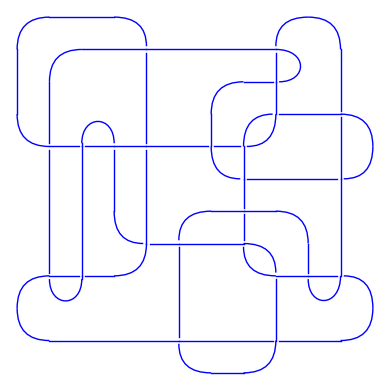

In [4]:
D.sage_link().plot() 

A DT code of D_1 is given by

D=snappy.Link('DT: [(26,-30,24,-28,36,16,-38,-34,42,-46,40,-44,4,32,-6,-2,10,-14,8,-12,20,48,-22,-18)]')

We remark that the diagram has a nice 3-fold symmetry, that is not visible in this presentation of the diagram. (However, the KLO file shows the symmetry nicely.)

We can also see its 3-fold symmetry via snappy and see that it is strongly invertible.

In [5]:
K=D.exterior()
K.symmetry_group()

D3

In [6]:
K.symmetry_group().is_invertible_knot()

True

First we verify that D represents a fibered knot K of genus 7 which we can read-off directly from its knot Floer homology. 

In [7]:
D.knot_floer_homology()

{'L_space_knot': False,
 'epsilon': 1,
 'fibered': True,
 'modulus': 2,
 'nu': 7,
 'ranks': {(-7, -14): 1,
  (-6, -13): 1,
  (-6, -12): 3,
  (-5, -11): 8,
  (-5, -10): 3,
  (-4, -10): 11,
  (-4, -9): 12,
  (-3, -9): 9,
  (-3, -8): 31,
  (-2, -8): 3,
  (-2, -7): 58,
  (-2, -6): 3,
  (-1, -6): 82,
  (-1, -5): 6,
  (0, -5): 91,
  (0, -4): 6,
  (1, -4): 82,
  (1, -3): 6,
  (2, -4): 3,
  (2, -3): 58,
  (2, -2): 3,
  (3, -3): 9,
  (3, -2): 31,
  (4, -2): 11,
  (4, -1): 12,
  (5, -1): 8,
  (5, 0): 3,
  (6, -1): 1,
  (6, 0): 3,
  (7, 0): 1},
 'seifert_genus': 7,
 'tau': 7,
 'total_rank': 559}

We continue by checking that the diagram is really positive.

In [8]:
def sign_of_crossing(cros):
    '''
    Returns the sign of a crossing. (In a PD code that is ordered.)
    '''
    if cros[1]==0 and cros[3]!=1:
        return 1
    if cros[3]==0and cros[1]!=1:
        return -1
    if cros[1]>cros[3]:
        return +1
    return -1

def diagram_is_positive(PD_code):
    '''
    Checks if the diagram is positive (or negative). (In a PD code that is ordered.)
    '''
    pm=sign_of_crossing(PD_code[0])
    for c in PD_code:
        if sign_of_crossing(c)!=pm:
            return False
    return True

<>:7: DeprecationWarning: invalid decimal literal
<>:7: DeprecationWarning: invalid decimal literal
/tmp/ipykernel_2974343/221308939.py:7: DeprecationWarning: invalid decimal literal
  if cros[Integer(3)]==0and cros[Integer(1)]!=Integer(1):


In [9]:
PD=D.PD_code()
print(PD)

[(27, 1, 28, 0), (1, 27, 2, 26), (30, 4, 31, 3), (25, 5, 26, 4), (5, 25, 6, 24), (28, 24, 29, 23), (2, 32, 3, 31), (6, 30, 7, 29), (11, 33, 12, 32), (33, 11, 34, 10), (14, 36, 15, 35), (9, 37, 10, 36), (37, 9, 38, 8), (12, 8, 13, 7), (34, 16, 35, 15), (38, 14, 39, 13), (43, 17, 44, 16), (17, 43, 18, 42), (46, 20, 47, 19), (41, 21, 42, 20), (21, 41, 22, 40), (44, 40, 45, 39), (18, 0, 19, 47), (22, 46, 23, 45)]


In [10]:
diagram_is_positive(PD)

True

We show that it is not braid positive by demonstrating that Ito's normalized version of the HOMFLYPT polynomial is not positive. So it might in principle be a counterexample to Stoimenow's conjecture.

In [11]:
word=D.braid_word()
print(word)

[-1, -2, -3, 4, 5, 6, 7, -8, 7, 9, 6, -10, -5, 7, 9, -4, 6, 3, 5, 8, 2, -4, 7, 1, -3, -2, -4, -3, -5, -4, 6, 5, 6, 7, -8, 7, -9, 6, 10, -5, 7, 4, 6, 8, 3, 5, 7, 2, 4, 6, 3, 5, 6, 7, -8, 7, -9, 6, -5, 7, 4, 6, 8, -5, 7, 6]


In [12]:
var('a,b,v,z')

R = PolynomialRing(ZZ, ['a','b'])

def HOMFLY(word):
    '''
    Computes the HOMFLY polynomial.
    '''
    K=snappy.Link(braid_closure=word)
    K.simplify(mode='global')
    L=K.sage_link()
    h(v,z) = L.homfly_polynomial('v', 'z', 'az')
    return h(v,z)

def normalized_HOMFLY(word):
    '''
    Given the braid word of an L-space knot. Returns Ito's normalized version of the HOMFLY.
    '''
    L=snappy.Link(braid_closure=word)
    alex=L.exterior().alexander_polynomial()
    g=alex.degree()/2
    h(v,z)=HOMFLY(word)
    homfly=(h((-a)^(-1/2),b^(1/2))*(-a)^(-g)).expand()
    return homfly

In [13]:
hom=normalized_HOMFLY(word)
hom

-a^4*b^3 + 2*a^3*b^4 - 2*a*b^6 + b^7 - 3*a^4*b^2 + 13*a^3*b^3 - 3*a^2*b^4 - 21*a*b^5 + 14*b^6 - 3*a^4*b + 27*a^3*b^2 - 12*a^2*b^3 - 79*a*b^4 + 75*b^5 - a^4 + 23*a^3*b - 9*a^2*b^2 - 136*a*b^3 + 193*b^4 + 7*a^3 + 9*a^2*b - 111*a*b^2 + 247*b^3 + 9*a^2 - 36*a*b + 144*b^2 + 27*b

Next, we demonstrate that the unknotting number of the diagram D is 9 and thus larger than 7. Moreover we try to compute its algebraic unknotting number. We also check that our proof strategy for positive rbaids dos not work, by checking that any of these knots is not positive fibered with the correct genus.

For that we change all possible sets of up to 9 crossings and check if the fundamental group of the corresponding knot is free abelian (in that case the knot is verfied to be an unknot). In case it is not the unknot we compute its Alexander polynomial and if that is trivial its Jone spolynomial to verify that the knot is not trivial.

If the Alexander polynomial is not monic the knot cannot be fibered. If it is monic we compute the knot Floer homology to verify the fiberedness and the correct genus. If we have such a knot we check if it is positive.

In [14]:
def is_unknot(PD):
    '''
    Returns True if it represents the unknot and False if the group looks not free abelian.
    '''
    K=snappy.Link(PD).exterior()
    if K.fundamental_group().num_generators()==1:
        return True
    return False

def is_trivial_Jones(PD):
    K=snappy.Link(PD)
    jones=K.jones_polynomial()
    if jones==1:
        return True
    return False

def change_crossing(PD_code,crossing):
    '''
    Changes the crossing.
    '''
    (a,b,c,d)=crossing
    PD_code.remove(crossing)
    PD_code.append((d,a,b,c))
    return PD_code

def unknotting_search(PD,depth=9):
    start_time=time.time()
    crossing_list=list(itertools.combinations(PD, depth))
    w=False
    for crossings in crossing_list:
        PD_new=PD.copy()
        for c in crossings:
            PD_new=change_crossing(PD_new,c)
        if is_unknot(PD_new):
            print('An unknotting sequence:',crossings)
            w=True
            break
        else:
            alex=snappy.Link(PD_new).exterior().alexander_polynomial()
            if alex==1:
                print('We found a algebraic unknotting sequence:',crossings)
                if is_trivial_Jones(PD_new):
                    print('A sequence to a knot with trivial Jones polynomial:',crossings)
            if alex.is_monic() or (-alex).is_monic():
                if alex.degree()/2==7-depth:
                    kfh=D.knot_floer_homology()
                    if kfh.get('fibered'):
                        if kfh.get('seifert_genus')==7-depth:
                            print('We found a fibered knot with the correct genus:',crossings)
                            S=snappy.Link(PD_new)
                            S.simplify('global')
                            print('Its PD code is:',S.PD_code())
                            print('The diagram is positive:',diagram_is_positive(S.PD_code()))       
    if w==False:
        print('No unknotting sequence found!')
    print('Total time taken:',(time.time()-start_time)/60,'minutes')


In [14]:
unknotting_search(PD,1)

No unknotting sequence found!
Total time taken: 0.011834824085235595 minutes


In [15]:
unknotting_search(PD,2)

No unknotting sequence found!
Total time taken: 0.08272377252578736 minutes


In [16]:
unknotting_search(PD,3)

No unknotting sequence found!
Total time taken: 0.6955813686052958 minutes


In [17]:
unknotting_search(PD,4)

No unknotting sequence found!
Total time taken: 2.7964422861735025 minutes


In [18]:
unknotting_search(PD,5)

No unknotting sequence found!
Total time taken: 11.453219691912333 minutes


In [19]:
unknotting_search(PD,6)

No unknotting sequence found!
Total time taken: 27.72776108980179 minutes


In [20]:
unknotting_search(PD,7)

No unknotting sequence found!
Total time taken: 66.501346941789 minutes


In [21]:
unknotting_search(PD,8)

No unknotting sequence found!
Total time taken: 117.3009952267011 minutes


In [34]:
unknotting_search(PD,9)

An unknotting sequence: ((24, 0, 25, 47), (29, 1, 30, 0), (1, 29, 2, 28), (2, 24, 3, 23), (6, 36, 7, 35), (34, 8, 35, 7), (8, 32, 9, 31), (37, 11, 38, 10), (45, 17, 46, 16))
Total time taken: 1.6776767452557881 minutes


This proves that the (algebraic) unknotting number of the diagram D is 9 and that our proof strategy for positive braids does not work for the diagram D.

We print a few more interesting invariants of K.

We check its crossing number.

In [15]:
D.jones_polynomial()

q^14 - 2*q^18 + 5*q^20 - 4*q^22 - 5*q^24 + 22*q^26 - 42*q^28 + 59*q^30 - 69*q^32 + 69*q^34 - 58*q^36 + 41*q^38 - 20*q^40 + 6*q^42 + q^44 - 3*q^46 + q^48 - q^50

In [16]:
D

<Link: 1 comp; 24 cross>

In [17]:
D.simplify('global',type_III_limit=5000)

False

So the crossing number of K lies in between 18 and 24. We would expect the crossing number to be 24.

In [18]:
D.alexander_polynomial()

t^14 + 2*t^13 - 5*t^12 - t^11 + 22*t^10 - 52*t^9 + 76*t^8 - 85*t^7 + 76*t^6 - 52*t^5 + 22*t^4 - t^3 - 5*t^2 + 2*t + 1

In [19]:
K.is_two_bridge()

False

In [20]:
K.verify_hyperbolicity()[0]

True

In [21]:
K.volume(verified=True)

29.248629919?

In [22]:
K.identify()

[]

In [23]:
K.num_tetrahedra()

33

In [24]:
K.short_slopes()

[[(1, 0)]]

The known lower bounds on the unknotting number can be devided into 4 types:

(1) Bounds that are lower bounds for the smooth 4-genus. These will not help here since the smooth 4-genus of a positive knot agrees with its 3-genus and is here 7.

(2) Other bounds from gauge theory, that are all smaller than 7.

(3) Bounds on the algebraic unknotting number. The algebraic unknotting number in the above diagram is also 9. But can we maybe see that it is 7?

(4) Bounds on the rational unknotting number. An explicit construction (see KLO file) shows that the rational unknotting number is at most 5. So this will not help us here as well. A lower bound on the rational unknotting number is given by the rank of the first homology of the double branched cover. We compute it in our example to be 3.

In [25]:
K.dehn_fill((2,0))

In [26]:
cov=K.covers(2)

In [27]:
cov

[unnamed link~cyc~0(1,0)]

In [28]:
DBC=cov[0]

In [29]:
DBC.homology()

Z/5 + Z/5 + Z/15

For completeness we perform some of the above computations for some more knots from the infinite family:

In [17]:
for n in range(1,11):
    D=snappy.Link(create_D_n(n))
    word=D.braid_word()
    hom=normalized_HOMFLY(word)
    print(n)
    print(hom)
    print('---------------')

1
-a^4*b^3 + 2*a^3*b^4 - 2*a*b^6 + b^7 - 3*a^4*b^2 + 13*a^3*b^3 - 3*a^2*b^4 - 21*a*b^5 + 14*b^6 - 3*a^4*b + 27*a^3*b^2 - 12*a^2*b^3 - 79*a*b^4 + 75*b^5 - a^4 + 23*a^3*b - 9*a^2*b^2 - 136*a*b^3 + 193*b^4 + 7*a^3 + 9*a^2*b - 111*a*b^2 + 247*b^3 + 9*a^2 - 36*a*b + 144*b^2 + 27*b
---------------
2
-a^6*b^6 + 4*a^5*b^7 - 5*a^4*b^8 + 5*a^2*b^10 - 4*a*b^11 + b^12 - 7*a^6*b^5 + 41*a^5*b^6 - 70*a^4*b^7 + 10*a^3*b^8 + 85*a^2*b^9 - 83*a*b^10 + 24*b^11 - 20*a^6*b^4 + 162*a^5*b^5 - 380*a^4*b^6 + 120*a^3*b^7 + 600*a^2*b^8 - 730*a*b^9 + 248*b^10 - 30*a^6*b^3 + 330*a^5*b^4 - 1045*a^4*b^5 + 550*a^3*b^6 + 2310*a^2*b^7 - 3560*a*b^8 + 1445*b^9 - 25*a^6*b^2 + 380*a^5*b^3 - 1590*a^4*b^4 + 1240*a^3*b^5 + 5390*a^2*b^6 - 10588*a*b^7 + 5225*b^8 - 11*a^6*b + 249*a^5*b^2 - 1340*a^4*b^3 + 1450*a^3*b^4 + 8020*a^2*b^5 - 19918*a*b^6 + 12164*b^7 - 2*a^6 + 86*a^5*b - 560*a^4*b^2 + 810*a^3*b^3 + 7750*a^2*b^4 - 23746*a*b^5 + 18298*b^6 + 12*a^5 - 65*a^4*b + 130*a^3*b^2 + 4770*a^2*b^3 - 17360*a*b^4 + 17326*b^5 + 15*a^4 - 3

6
-a^14*b^18 + 12*a^13*b^19 - 65*a^12*b^20 + 208*a^11*b^21 - 429*a^10*b^22 + 572*a^9*b^23 - 429*a^8*b^24 + 429*a^6*b^26 - 572*a^5*b^27 + 429*a^4*b^28 - 208*a^3*b^29 + 65*a^2*b^30 - 12*a*b^31 + b^32 - 23*a^14*b^17 + 313*a^13*b^18 - 1898*a^12*b^19 + 6734*a^11*b^20 - 15301*a^10*b^21 + 22451*a^9*b^22 - 18876*a^8*b^23 + 1716*a^7*b^24 + 18447*a^6*b^25 - 27313*a^5*b^26 + 22022*a^4*b^27 - 11362*a^3*b^28 + 3757*a^2*b^29 - 731*a*b^30 + 64*b^31 - 244*a^14*b^16 + 3754*a^13*b^17 - 25480*a^12*b^18 + 100360*a^11*b^19 - 251680*a^10*b^20 + 406978*a^9*b^21 - 382668*a^8*b^22 + 68640*a^7*b^23 + 368940*a^6*b^24 - 610610*a^5*b^25 + 530816*a^4*b^26 - 292136*a^3*b^27 + 102440*a^2*b^28 - 21050*a*b^29 + 1940*b^30 - 1590*a^14*b^15 + 27570*a^13*b^16 - 209313*a^12*b^17 + 915954*a^11*b^18 - 2538822*a^10*b^19 + 4530240*a^9*b^20 - 4755465*a^8*b^21 + 1271556*a^7*b^22 + 4563702*a^6*b^23 - 8500206*a^5*b^24 + 7990125*a^4*b^25 - 4702230*a^3*b^26 + 1752582*a^2*b^27 - 381156*a*b^28 + 37053*b^29 - 7146*a^14*b^14 + 139247*a^1

8
-a^18*b^24 + 16*a^17*b^25 - 119*a^16*b^26 + 544*a^15*b^27 - 1700*a^14*b^28 + 3808*a^13*b^29 - 6188*a^12*b^30 + 7072*a^11*b^31 - 4862*a^10*b^32 + 4862*a^8*b^34 - 7072*a^7*b^35 + 6188*a^6*b^36 - 3808*a^5*b^37 + 1700*a^4*b^38 - 544*a^3*b^39 + 119*a^2*b^40 - 16*a*b^41 + b^42 - 31*a^18*b^23 + 545*a^17*b^24 - 4420*a^16*b^25 + 21896*a^15*b^26 - 73780*a^14*b^27 + 177548*a^13*b^28 - 309400*a^12*b^29 + 380120*a^11*b^30 - 286858*a^10*b^31 + 24310*a^9*b^32 + 272272*a^8*b^33 - 433160*a^7*b^34 + 402220*a^6*b^35 - 260372*a^5*b^36 + 121720*a^4*b^37 - 40664*a^3*b^38 + 9265*a^2*b^39 - 1295*a*b^40 + 84*b^41 - 452*a^18*b^22 + 8718*a^17*b^23 - 77078*a^16*b^24 + 413984*a^15*b^25 - 1505520*a^14*b^26 + 3896536*a^13*b^27 - 7289464*a^12*b^28 + 9632064*a^11*b^29 - 7954232*a^10*b^30 + 1312740*a^9*b^31 + 7205484*a^8*b^32 - 12609376*a^7*b^33 + 12450256*a^6*b^34 - 8490888*a^5*b^35 + 4162280*a^4*b^36 - 1453568*a^3*b^37 + 345372*a^2*b^38 - 50242*a*b^39 + 3386*b^40 - 4130*a^18*b^21 + 87254*a^17*b^22 - 840599*a^16*b^2

9
-a^20*b^27 + 18*a^19*b^28 - 152*a^18*b^29 + 798*a^17*b^30 - 2907*a^16*b^31 + 7752*a^15*b^32 - 15504*a^14*b^33 + 23256*a^13*b^34 - 25194*a^12*b^35 + 16796*a^11*b^36 - 16796*a^9*b^38 + 25194*a^8*b^39 - 23256*a^7*b^40 + 15504*a^6*b^41 - 7752*a^5*b^42 + 2907*a^4*b^43 - 798*a^3*b^44 + 152*a^2*b^45 - 18*a*b^46 + b^47 - 35*a^20*b^26 + 685*a^19*b^27 - 6251*a^18*b^28 + 35283*a^17*b^29 - 137598*a^16*b^30 + 391476*a^15*b^31 - 833340*a^14*b^32 + 1329468*a^13*b^33 - 1536834*a^12*b^34 + 1116934*a^11*b^35 - 92378*a^10*b^36 - 1049750*a^9*b^37 + 1713192*a^8*b^38 - 1670556*a^7*b^39 + 1166676*a^6*b^40 - 608532*a^5*b^41 + 237405*a^4*b^42 - 67659*a^3*b^43 + 13357*a^2*b^44 - 1637*a*b^45 + 94*b^46 - 580*a^20*b^25 + 12328*a^19*b^26 - 121543*a^18*b^27 + 737808*a^17*b^28 - 3082389*a^16*b^29 + 9364416*a^15*b^30 - 21236604*a^14*b^31 + 36062304*a^13*b^32 - 44492604*a^12*b^33 + 35137232*a^11*b^34 - 5635058*a^10*b^35 - 31173376*a^9*b^36 + 55653546*a^8*b^37 - 57426816*a^7*b^38 + 42066228*a^6*b^39 - 22914912*a^5*b^4

10
-a^22*b^30 + 20*a^21*b^31 - 189*a^20*b^32 + 1120*a^19*b^33 - 4655*a^18*b^34 + 14364*a^17*b^35 - 33915*a^16*b^36 + 62016*a^15*b^37 - 87210*a^14*b^38 + 90440*a^13*b^39 - 58786*a^12*b^40 + 58786*a^10*b^42 - 90440*a^9*b^43 + 87210*a^8*b^44 - 62016*a^7*b^45 + 33915*a^6*b^46 - 14364*a^5*b^47 + 4655*a^4*b^48 - 1120*a^3*b^49 + 189*a^2*b^50 - 20*a*b^51 + b^52 - 39*a^22*b^29 + 841*a^21*b^30 - 8526*a^20*b^31 + 53970*a^19*b^32 - 238735*a^18*b^33 + 781641*a^17*b^34 - 1953504*a^16*b^35 + 3775224*a^15*b^36 - 5610510*a^14*b^37 + 6172530*a^13*b^38 - 4350164*a^12*b^39 + 352716*a^11*b^40 + 4056234*a^10*b^41 - 6760390*a^9*b^42 + 6860520*a^8*b^43 - 5093064*a^7*b^44 + 2896341*a^6*b^45 - 1272411*a^5*b^46 + 426930*a^4*b^47 - 106190*a^3*b^48 + 18501*a^2*b^49 - 2019*a*b^50 + 104*b^51 - 724*a^22*b^28 + 16818*a^21*b^29 - 182868*a^20*b^30 + 1236760*a^19*b^31 - 5825400*a^18*b^32 + 20250846*a^17*b^33 - 53612832*a^16*b^34 + 109582272*a^15*b^35 - 172210680*a^14*b^36 + 201002900*a^13*b^37 - 153078744*a^12*b^38 + 239

In [45]:
for n in range(1,11):
    D=snappy.Link(create_D_n(n))
    word=D.braid_word()
    hom=normalized_HOMFLY(word)
    print(n)
    print(hom(a=a,b=0))
    print('---------------')

1
-a^4 + 7*a^3 + 9*a^2
---------------
2
-2*a^6 + 12*a^5 + 15*a^4
---------------
3
-3*a^8 + 17*a^7 + 21*a^6
---------------
4
-4*a^10 + 22*a^9 + 27*a^8
---------------
5
-5*a^12 + 27*a^11 + 33*a^10
---------------
6
-6*a^14 + 32*a^13 + 39*a^12
---------------
7
-7*a^16 + 37*a^15 + 45*a^14
---------------
8
-8*a^18 + 42*a^17 + 51*a^16
---------------
9
-9*a^20 + 47*a^19 + 57*a^18
---------------
10
-10*a^22 + 52*a^21 + 63*a^20
---------------


In [5]:
for n in range(1,13):
    D=snappy.Link(create_D_n(n))
    K=D.exterior()
    K.dehn_fill((2,0))
    cov=K.covers(2)
    DBC=cov[0]
    print(n)
    print(DBC.homology())
    print('---------------')

1
Z/5 + Z/5 + Z/15
---------------
2
Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5
---------------
3
Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/35
---------------
4
Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/45
---------------
5
Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/55
---------------
6
Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/65
---------------
7
Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/15
---------------
8
Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/85
---------------
9
Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/95
---------------
10
Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/105
---------------
11
Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 + Z/5 